In [1]:
from keras.models import Sequential
from keras.layers import Dense
import json
from keras.models import model_from_json, load_model
import numpy
import os
import cv2 

Using TensorFlow backend.


In [2]:
# load json and create model
json_file = open('FSDNetmask-8020.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("FSDNetmask-8020.h5")
print("Loaded model from disk")


Loaded model from disk


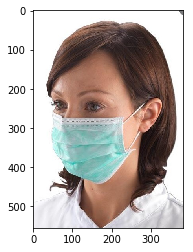

In [40]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from scipy.misc import imresize
img = load_img('blue mask.jpg')
#img1=imresize(img,[224, 224])
plt.imshow(img)

C:\Users\rola\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


(1, 224, 224, 3)
Class:  stylish-mask
accuracy: 100.0000%
Case:80%-20% 
FSDNet 


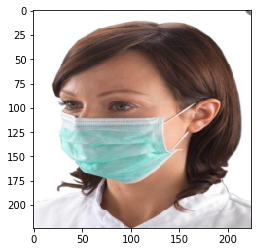

In [41]:
from keras.preprocessing.image import load_img
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from scipy.misc import imresize
import numpy as np
from keras.preprocessing import image


class_mapping = ["black-mask","blue-mask","n95-mask","stylish-mask","white-mask","without-mask"]

img = load_img('blue mask.jpg')
img1=imresize(img,[224, 224])
plt.imshow(img1)

# convert the image pixels to a numpy array
image = img_to_array(img1)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model
image = preprocess_input(image)
preds = loaded_model.predict(image)
predicted_classes = np.argmax(np.round(preds),axis=1)
predicted_classes1 = np.array(predicted_classes)
predicted_classes2=predicted_classes1[0]
classname = class_mapping[predicted_classes2]
maxpred=np.amax(preds)

print(image.shape)
print("Class: ",classname)
print("accuracy: {:.4f}%".format(maxpred*100))
print("Case:80%-20% ")
print("FSDNet ")